## Analysing and Visualising the Loan Data

__Import the necessary modules__ 

In [151]:
import pandas as pd
import seaborn as sns

__Load the EDA data to this file.__

_Note: the data which removed the overly correlated columns has not been used here due to some columns needed in this analysis being removed during that step_

In [152]:
EDA_data = pd.read_csv('removed_outliers_data.csv')

#### __Insight 1: Current State of the Loans__
This insight requires the calculation of the percentage of the loans recovered against the investor funding and the total amount funded.

##### __A. Loans recovered against investor funding__

In [153]:
investor_funding = EDA_data['funded_amount_inv'].sum()
print(f"All investor funding for the loans is {investor_funding}")

All investor funding for the loans is 697351603.4909245


In [154]:
payments_for_investor_funding = EDA_data['total_payment_inv'].sum()
print(f"All payments received for investor funding is {payments_for_investor_funding}")

All payments received for investor funding is 635307122.64


In [155]:
percentage_recovered_against_investors = (payments_for_investor_funding/investor_funding)*100
print(f"Percentage of loans recovered against investor funding is {percentage_recovered_against_investors}%")

Percentage of loans recovered against investor funding is 91.10284101444216%


__Visualise the loans recovered against investor funding in the scatterplot below.__

<Axes: xlabel='funded_amount_inv', ylabel='total_payment_inv'>

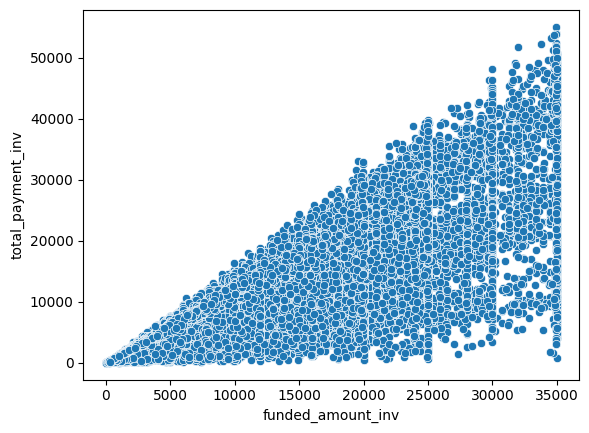

In [156]:
sns.scatterplot(x = EDA_data['funded_amount_inv'], y = EDA_data['total_payment_inv'])

##### __B. Loans recovered against total amount funded__

In [157]:
funding = EDA_data['funded_amount'].sum()
print(f"All funding for the loans is {funding}")

All funding for the loans is 708242600.0


In [158]:
payments_for_funding = EDA_data['total_payment'].sum()
print(f"All payments received for funding is {payments_for_funding}")

All payments received for funding is 650712368.5946423


In [159]:
percentage_recovered_against_total_funds = (payments_for_funding/funding)*100
print(f"Percentage of loans recovered against total funding is {percentage_recovered_against_total_funds}%")

Percentage of loans recovered against total funding is 91.87704447524652%


__Visualise the loans recovered against total funding in the scatterplot below.__

<Axes: xlabel='funded_amount', ylabel='total_payment'>

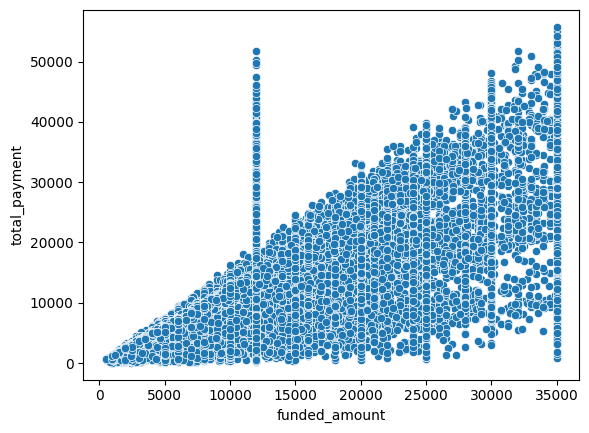

In [160]:
sns.scatterplot(x = EDA_data['funded_amount'], y = EDA_data['total_payment'])

##### __C. Amount recovered in future 6 months__

__Concise data so that only data with a loan status of 'Current' is considered.__

In [161]:
current = EDA_data[EDA_data['loan_status'].str.contains('Current')]
print(f"All data where the loan_status is 'Current':\n{current['loan_status']}")

All data where the loan_status is 'Current':
0        Current
1        Current
4        Current
5        Current
8        Current
          ...   
46684    Current
49480    Current
50794    Current
52545    Current
52886    Current
Name: loan_status, Length: 19148, dtype: object


__Calculate the instalment to be received in 6 months (excluding interest).__

In [162]:
instalment_6mths = current['instalment']*6
print(f"Instalments to be received in next 6 months: {instalment_6mths}")

Instalments to be received in next 6 months: 0        1492.92
1        2445.12
4        2739.24
5         499.20
8        1364.88
          ...   
46684    1807.92
49480    1046.28
50794    2399.82
52545     518.88
52886    4746.96
Name: instalment, Length: 19148, dtype: float64


In [163]:
sum_instalments = instalment_6mths.sum()
print(f"Total instalments to be received at the end of 6 months: {sum_instalments}")

Total instalments to be received at the end of 6 months: 50756359.260000005


In [164]:
total_recovered_6mths = sum_instalments + (EDA_data['total_payment'].sum())
print(f"Total recovered, including the next 6 months: {total_recovered_6mths}")

Total recovered, including the next 6 months: 701468727.8546423


In [165]:
percentage_recovered_6mths = (total_recovered_6mths/funding)*100
print(f"Percentage of total recovered including the next 6 months: {percentage_recovered_6mths}%")

Percentage of total recovered including the next 6 months: 99.0435661247491%


__Visualise the loans recovered in the next 6 months.__

<Axes: xlabel='funded_amount', ylabel='None'>

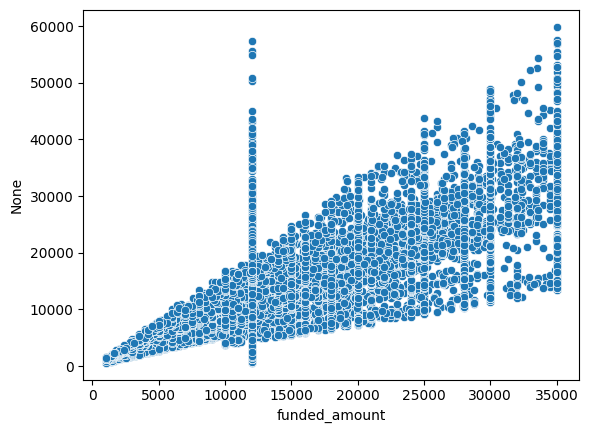

In [166]:

sns.scatterplot(x = EDA_data['funded_amount'], y = (instalment_6mths + EDA_data['total_payment']))

#### __Insight 2: Calculating Loss of the Loans__
This insight requires the percentage of charged off loans historically to be calculated and the amount paid before charged off.

##### __A. Loans charged off__

In [167]:
charged_off  = EDA_data[EDA_data['loan_status'].str.contains('Charged Off')]
print(f"All data where the loan_status is 'Charged Off':\n{charged_off['loan_status']}")

All data where the loan_status is 'Charged Off':
7                                              Charged Off
56                                             Charged Off
87                                             Charged Off
114                                            Charged Off
134                                            Charged Off
                               ...                        
53718    Does not meet the credit policy. Status:Charge...
53722                                          Charged Off
53726                                          Charged Off
53740    Does not meet the credit policy. Status:Charge...
53758    Does not meet the credit policy. Status:Charge...
Name: loan_status, Length: 5825, dtype: object


In [168]:
total_charged_off = charged_off['loan_status'].count()
print(f"The total number of loans charged off is: {total_charged_off}")

The total number of loans charged off is: 5825


In [169]:
total_loans = EDA_data['loan_status'].count()
percentage_charged_off = (total_charged_off/total_loans)*100
print(f"The percentage of loans historically charged off is: {percentage_charged_off}%")

The percentage of loans historically charged off is: 10.8353950036273%


##### __B. Amount paid off before the loans were charged off.__

In [170]:
amount_paid_before_charged_off = charged_off['total_payment'].sum()
print(f"The amount paid before charged off is: {amount_paid_before_charged_off}")

The amount paid before charged off is: 38913209.32350347


__Calculate the percentage that the loans were paid before they were charged off.__

In [171]:
loan_amount_charged_off = charged_off['loan_amount'].sum()
print(f"The total of loans that were charged off: {loan_amount_charged_off}")

The total of loans that were charged off: 78841900


In [172]:
percentage_paid_before_charged_off = (amount_paid_before_charged_off/loan_amount_charged_off)*100
print(f"The percentage of the loan paid before charged off is: {percentage_paid_before_charged_off}%")

The percentage of the loan paid before charged off is: 49.35600147066911%


#### __Insight 3: Calculating Projected Loss__
In this insight, the projected loss of the loans that were 'Charged Off' is calculated.

##### __A. Revenue of charged off loans__

__Calculate interest for both term lengths.__

In [173]:
term_36 = charged_off[charged_off['term'] == 36]
term36_int_rate = (1+(term_36['int_rate']/1200))**36
print(f"Term interest rate for terms length 36 are: \n{term36_int_rate}")

Term interest rate for terms length 36 are: 
87       1.812595
114      1.473449
134      1.251073
203      1.591517
328      1.666228
           ...   
53718    1.609050
53722    1.372051
53726    1.492813
53740    1.479144
53758    1.411349
Name: int_rate, Length: 3233, dtype: float64


In [174]:
term_60 = charged_off[charged_off['term'] == 60]
term60_int_rate = (1+(term_60['int_rate']/1200))**60
print(f"Term interest rate for terms length 60 are: \n{term60_int_rate}")

Term interest rate for terms length 60 are: 
7        2.694645
56       2.267973
144      2.036571
185      1.907913
306      2.830425
           ...   
53588    1.668310
53590    1.721223
53613    2.244601
53614    1.694143
53621    2.012560
Name: int_rate, Length: 2592, dtype: float64


__Calculate the amount to be paid by the customer in total if they were not charged off.__

In [175]:
loan_to_be_paid36 = term_36['instalment']*term36_int_rate
total_to_be_paid36 = loan_to_be_paid36.sum()
print(f"Total for loans that should have been paid for term 36: {total_to_be_paid36}")

Total for loans that should have been paid for term 36: 1855408.5476997253


In [176]:
loan_to_be_paid60 = term_60['instalment']*term60_int_rate
total_to_be_paid60 = loan_to_be_paid60.sum()
print(f"Total loan that should have been paid for term 60: {total_to_be_paid60}")

Total loan that should have been paid for term 60: 2721205.230395672


In [177]:
expected_revenue_if_no_charged_off = total_to_be_paid36 + total_to_be_paid60
print(f"Total the customers should have paid if they were not charged off: {expected_revenue_if_no_charged_off}")

Total the customers should have paid if they were not charged off: 4576613.778095397


##### __B. Percentage expected revenue lost__

__Calculate how much of this total pay had been lost due to the loan being charged off.__

_(come back to this!!)_

In [178]:
increase_revenue_loss = expected_revenue_if_no_charged_off - amount_paid_before_charged_off
print(f"Increase in revenue lost due to the loans being charged off: {increase_revenue_loss}")

Increase in revenue lost due to the loans being charged off: -34336595.54540808


#### __Insight 4: Possible Loss__
This insight considers those whose loan status is 'Late'. Here, the potential loss of these loans status being changed to 'Charged Off' will be considered.

##### __A. Loans with late payment__

In [179]:
late = EDA_data[EDA_data['loan_status'].str.contains('Late')]
print(f"All data where the loan_status is 'Late':\n{late['loan_status']}")

All data where the loan_status is 'Late':
17       Late (31-120 days)
136      Late (31-120 days)
163      Late (31-120 days)
166      Late (31-120 days)
237       Late (16-30 days)
                ...        
43775     Late (16-30 days)
44176     Late (16-30 days)
45045    Late (31-120 days)
45277    Late (31-120 days)
46397    Late (31-120 days)
Name: loan_status, Length: 683, dtype: object


__Calculate the percentage of loans that have loan status 'Late'.__

In [180]:
total_late = late['loan_status'].count()
print(f"The total number of loans with status 'Late' is: {total_late}")

The total number of loans with status 'Late' is: 683


In [181]:
percentage_late = (total_late/total_loans)*100
print(f"The percentage of loans with the status 'Late' is: {percentage_late}%")

The percentage of loans with the status 'Late' is: 1.2704849420562139%


##### __B. Loss if loans are changed to 'Charged Off'__

In [182]:
amount_paid_late = late['total_payment'].sum()
print(f"The total amount paid by customers with the loan status 'Late' is: {amount_paid_late}")

The total amount paid by customers with the loan status 'Late' is: 6872141.09


__Calculate amount to be paid still.__

In [183]:
late_term60 = late[late['term'] == 60]
late_term60_int_rate = (1+(late_term60['int_rate']/1200))**60
print(f"Term interest rate for terms length 60 are: \n{late_term60_int_rate}")

Term interest rate for terms length 60 are: 
17       1.972185
368      1.540245
493      3.588723
551      2.341841
646      2.212715
           ...   
43775    1.614592
44176    2.375556
45045    2.128094
45277    1.707630
46397    1.967316
Name: int_rate, Length: 320, dtype: float64


In [184]:
late_term36 = late[late['term'] == 36]
late_term36_int_rate = (1+(late_term36['int_rate']/1200))**36
print(f"Term interest rate for terms length 36 are: \n{late_term36_int_rate}")

Term interest rate for terms length 36 are: 
136      1.563480
163      1.295847
166      1.480901
237      1.407161
283      1.480901
           ...   
32968    1.856427
33072    1.787625
33111    1.721814
33164    1.473449
35018    1.568584
Name: int_rate, Length: 363, dtype: float64


In [185]:
loan_late_paid36 = late_term36['instalment']*late_term36_int_rate
total_late_paid36 = loan_late_paid36.sum()
print(f"Total for loans that should have been paid for term 36: {total_late_paid36}")

Total for loans that should have been paid for term 36: 234991.328515348


In [186]:
loan_late_paid60 = late_term60['instalment']*late_term60_int_rate
total_late_paid60 = loan_late_paid60.sum()
print(f"Total for loans that should have been paid for term 60: {total_late_paid60}")

Total for loans that should have been paid for term 60: 391875.50726629334


In [187]:
expected_revenue_late = total_late_paid36 + total_late_paid60
print(f"Total the customers should have paid if they were not late: {expected_revenue_late}")

Total the customers should have paid if they were not late: 626866.8357816413


##### __C. Percentage customers defaulted__
The means the percentage of customers lost of charged off and if late was converted to charged off.

In [188]:
percentage_defaulted = ((total_late + total_charged_off)/total_loans)*100
print(f"Percentage of all loss if loans with late status are converted to charged off: {percentage_defaulted}%")

Percentage of all loss if loans with late status are converted to charged off: 12.105879945683514%


#### __Insight 5: Indicators of loss__
This insight involves analysing the data to visualise the possible indicators taht a customer will not be able to pay a loan.

In [189]:
print(f"Data for loan status being 'Late':\n{late}")

Data for loan status being 'Late':
       loan_amount  funded_amount  funded_amount_inv  term  int_rate  \
17           18825        18825.0       18825.000000    60     13.66   
136          15600        15600.0       15600.000000    36     14.99   
163           6000         6000.0        6000.000000    36      8.67   
166          15000        15000.0       15000.000000    36     13.16   
237           5000         5000.0        5000.000000    36     11.44   
...            ...            ...                ...   ...       ...   
43775        12000        12000.0       11793.180807    60      9.62   
44176        15000        15000.0       14975.000000    60     17.43   
45045        18000        18000.0       17900.000000    60     15.20   
45277        12000        12000.0       11950.000000    60     10.75   
46397        25000        25000.0       24975.000000    60     13.61   

       instalment grade sub_grade  employment_length home_ownership  ...  \
17         434.72     C 

In [190]:
print(f"Data for loan status being 'Charged Off':\n{charged_off}")

Data for loan status being 'Charged Off':
       loan_amount  funded_amount  funded_amount_inv  term  int_rate  \
7            26500        26500.0            26200.0    60     19.99   
56           11200        11200.0            11200.0    60     16.49   
87            8150         8150.0             8150.0    36     19.99   
114           7000         7000.0             7000.0    36     12.99   
134          14000        12000.0            14000.0    36      7.49   
...            ...            ...                ...   ...       ...   
53718        11050        11050.0             1175.0    36     15.96   
53722         1000         1000.0              950.0    36     10.59   
53726        20000        20000.0             2800.0    36     13.43   
53740         6725        12000.0              825.0    36     13.12   
53758         5000         5000.0              350.0    36     11.54   

       instalment grade sub_grade  employment_length home_ownership  ...  \
7          701.95

##### __A. Correlation Matrix__
Create a correlation for both late and charged off data to decide whcih columns are correlated and impact the loan being paid or not.

In [191]:
import matplotlib.pyplot as plt

__Correlation matrix for numerical values in 'Late' data:__

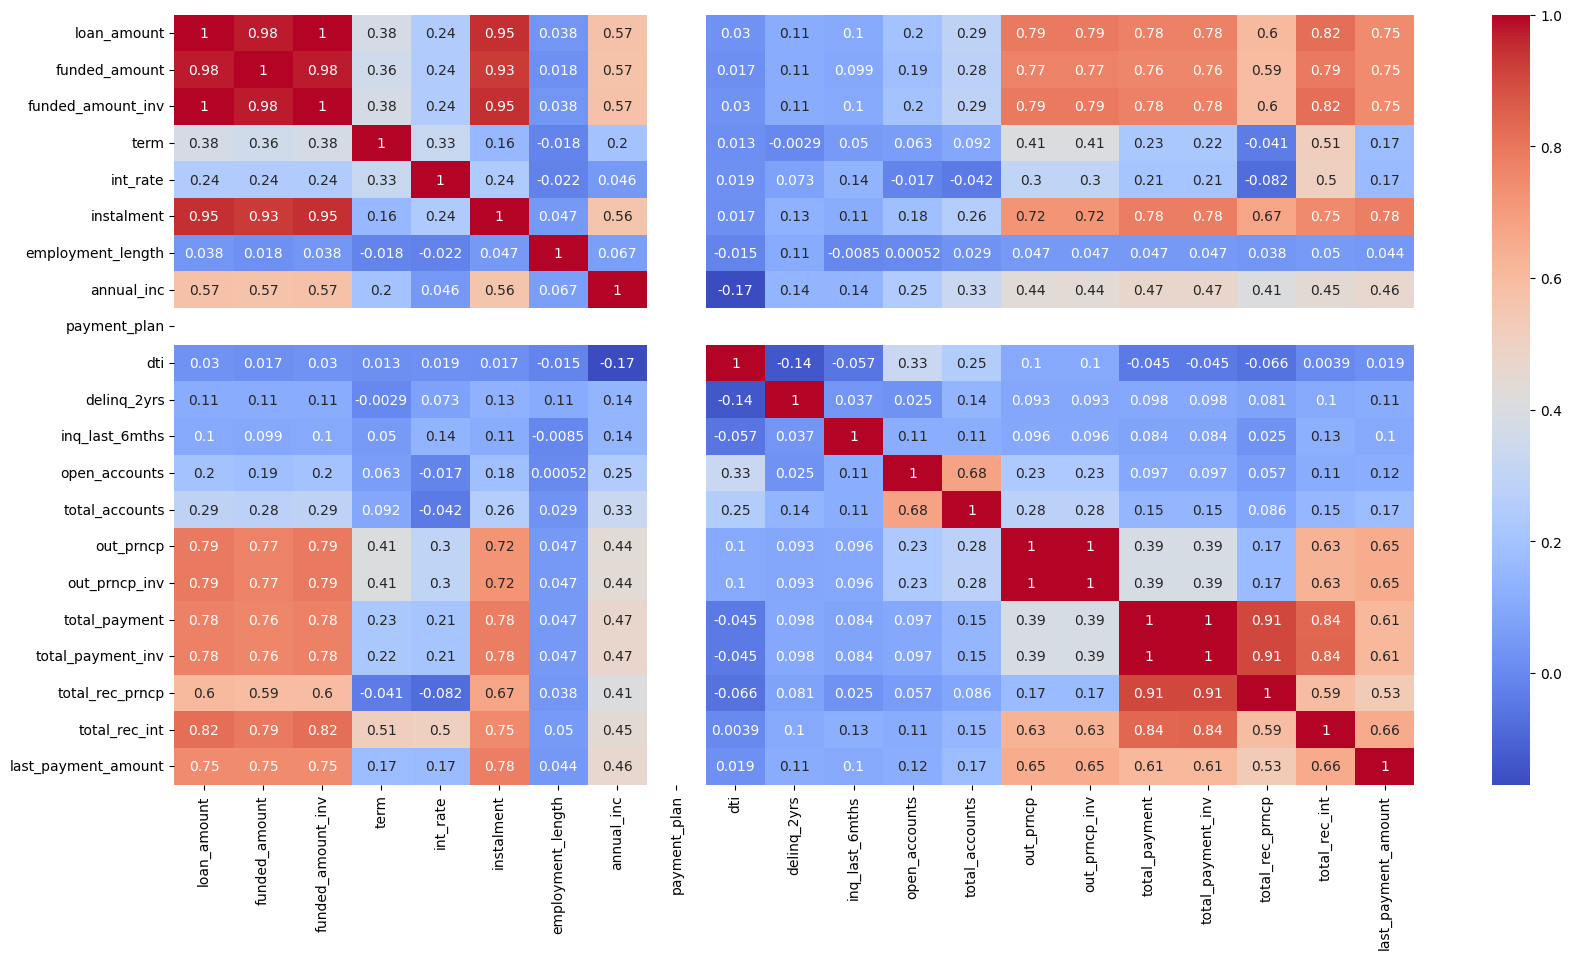

In [192]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(late.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

__Correlation matrix for numerical values in 'Charged Off' data:__

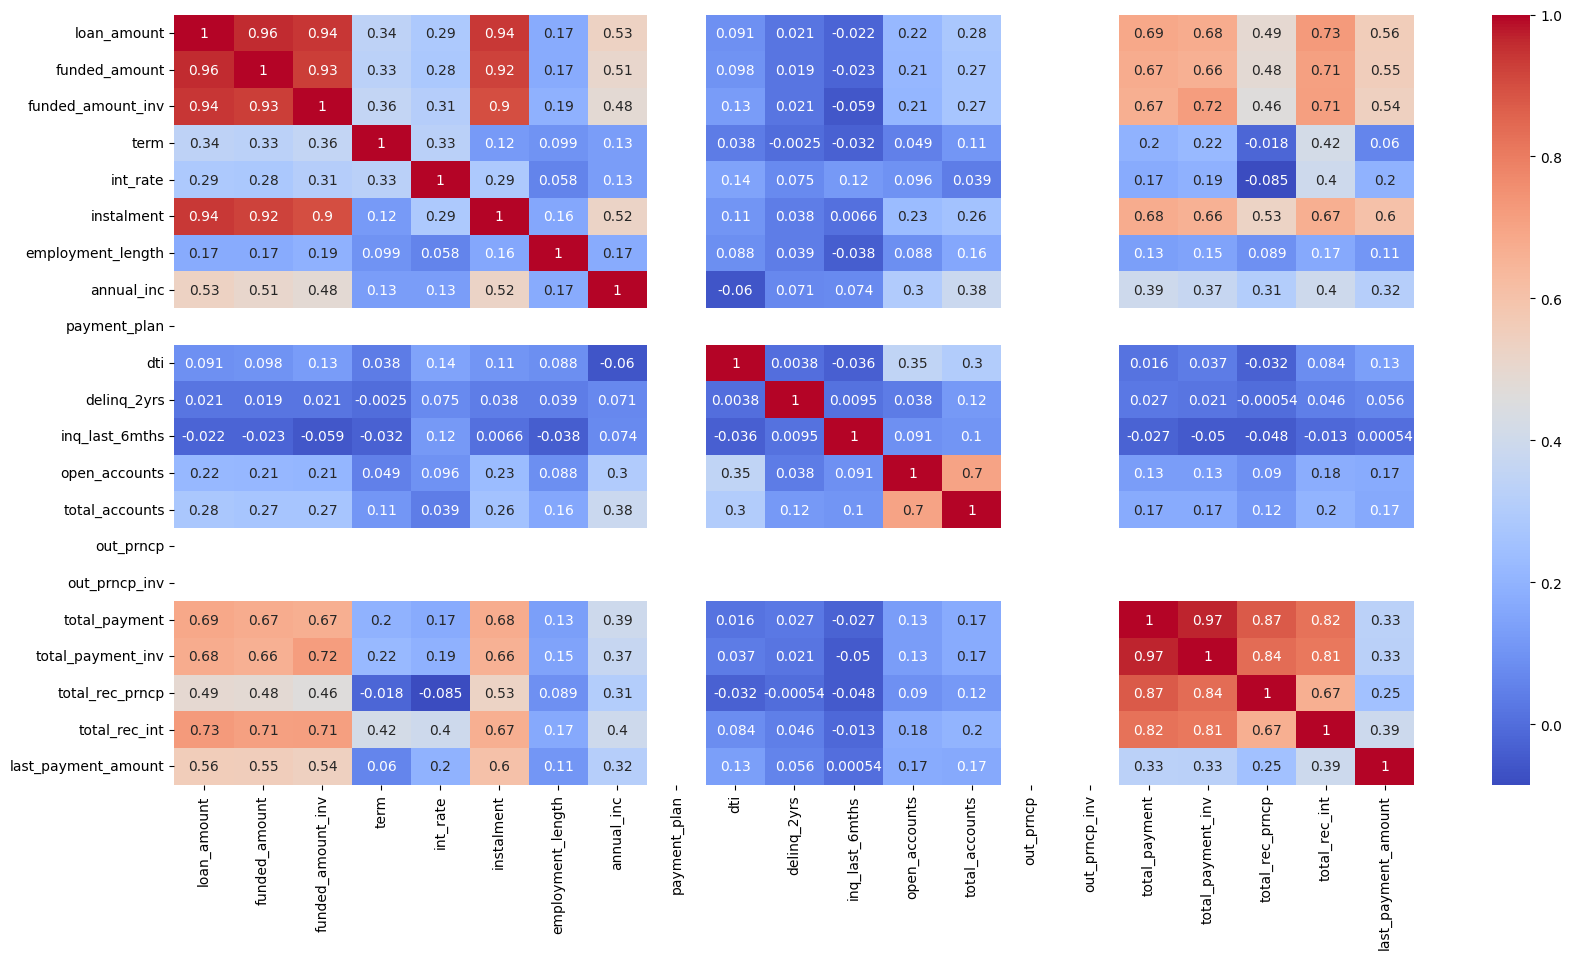

In [193]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(charged_off.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

##### __B. Bar plots for comparison__
Bar plots for charged off and late data wil be compared to see if there are any similarities in the:
1) Grade
2) Purpose

If there are similarities, do these have an effect on the customers not paying?

__Analysing grade of loan for late vs charged off.__

__Visualise grades for late vs charged off loan statuses__

/var/folders/qw/gn63v9cx5s96qvhh_bnr81mc0000gn/T/ipykernel_17397/1916483785.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




[Text(0.5, 1.0, 'Grades for Late Loan Status')]

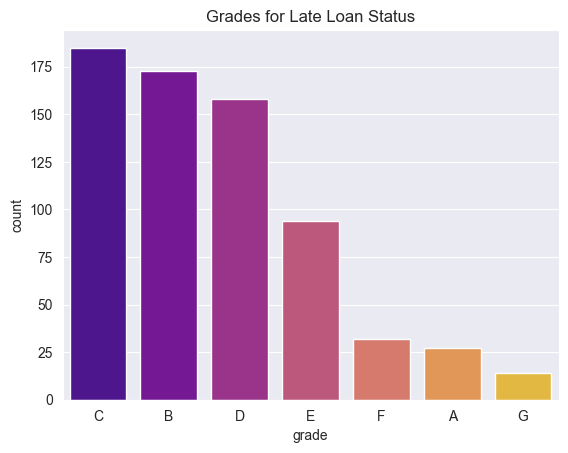

In [230]:
sns.countplot(x='grade', data=late, order=late['grade'].value_counts().index ,palette = 'plasma').set(title = 'Grades for Late Loan Status')

/var/folders/qw/gn63v9cx5s96qvhh_bnr81mc0000gn/T/ipykernel_17397/1461333321.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




[Text(0.5, 1.0, 'Grades for Charged Off Loan Status')]

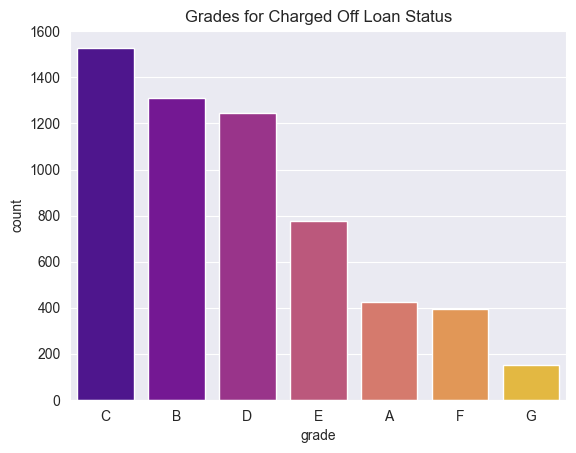

In [231]:
sns.countplot(x='grade', data=charged_off, order=charged_off['grade'].value_counts().index,palette = 'plasma').set(title = 'Grades for Charged Off Loan Status')

__Analysis for grade effecting loan status:__
1) Both have a majority of the loan grades as 'C', followed by 'B' and 'D'.
2) Both have the least amount of grade 'G' loans.

This indicates that the grades do have an effect on customers not paying. In particular, customers with grade 'G' loan are the least likely to not pay, whilst customers with a grade 'C', 'B' or 'D' loan are most likely to not pay.

__Analysing purpose of loan for late vs charged off.__

/var/folders/qw/gn63v9cx5s96qvhh_bnr81mc0000gn/T/ipykernel_17397/196817212.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




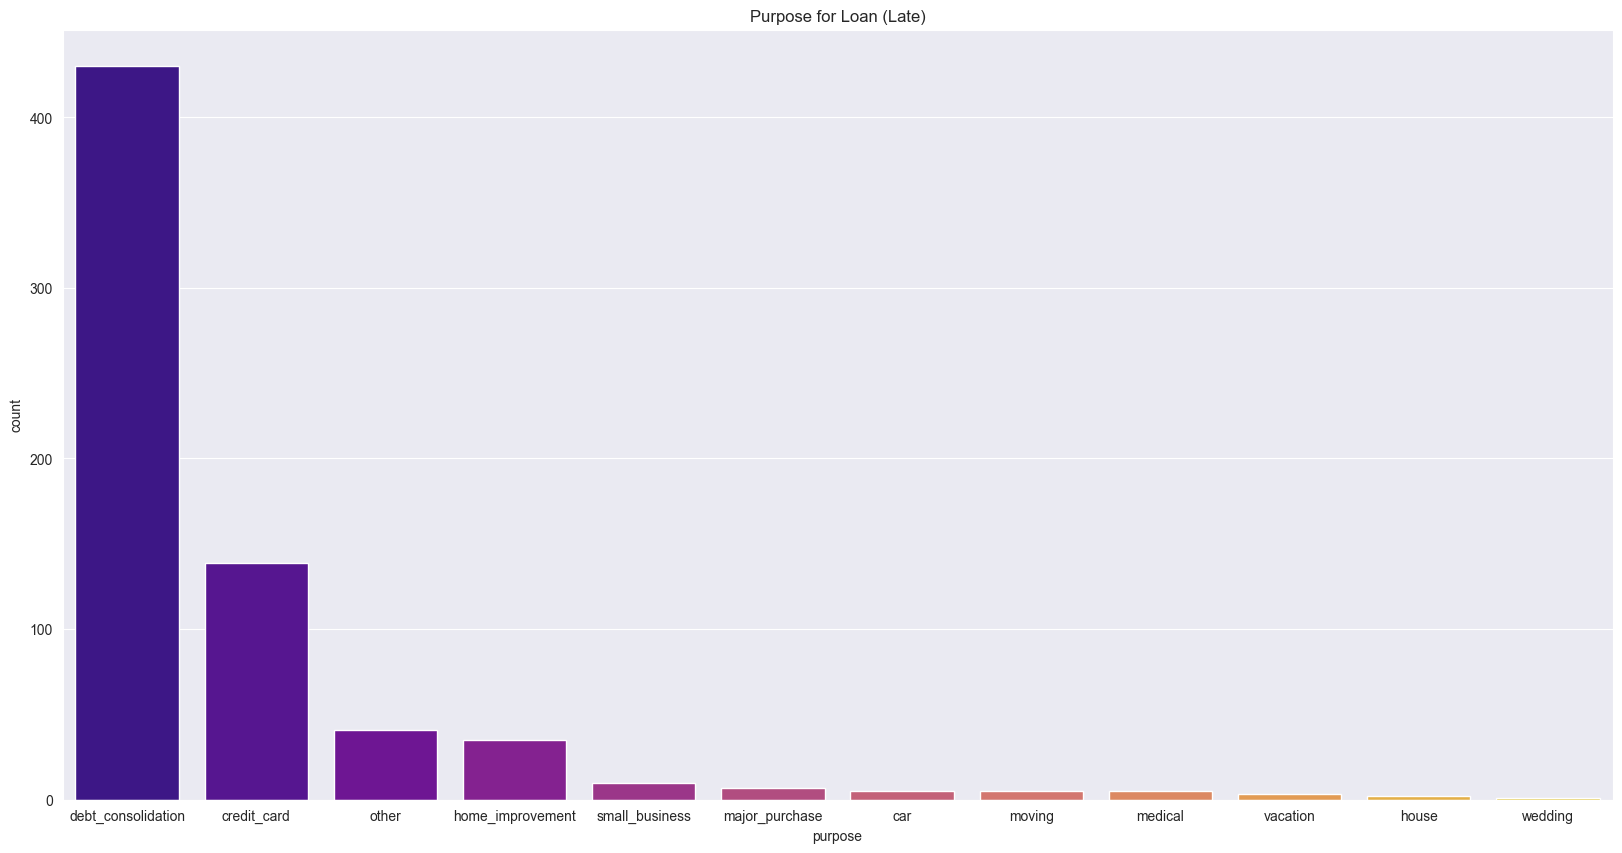

In [237]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='purpose',data=late, order=late['purpose'].value_counts().index,palette = 'plasma').set(title = 'Purpose for Loan (Late)')
plt.show()

/var/folders/qw/gn63v9cx5s96qvhh_bnr81mc0000gn/T/ipykernel_17397/3004453838.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




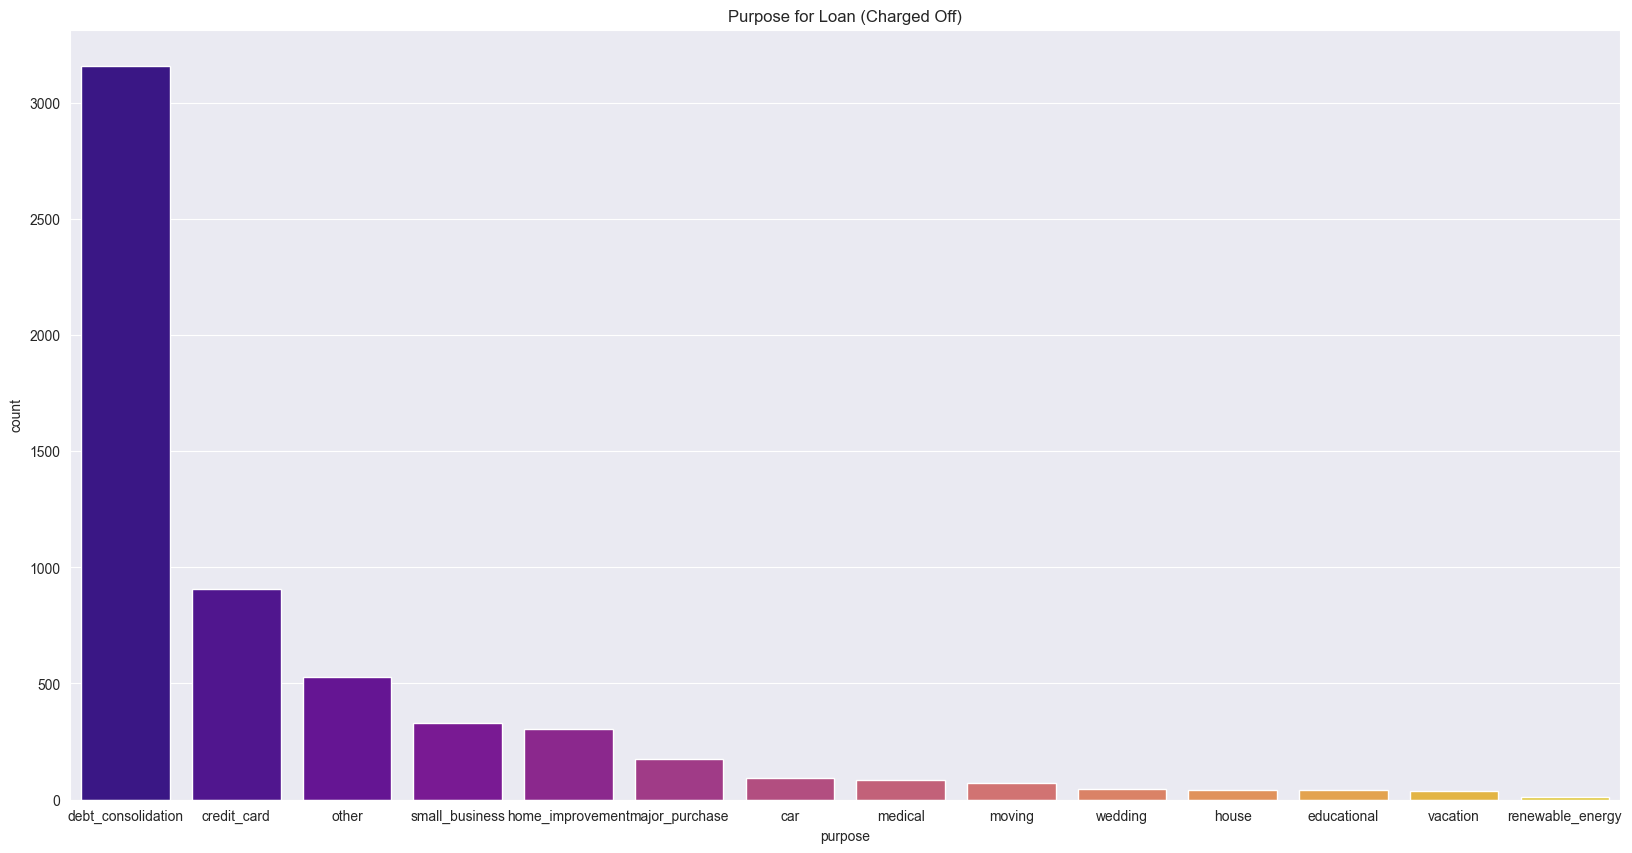

In [238]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='purpose', data=charged_off, order=charged_off['purpose'].value_counts().index,palette = 'plasma').set(title = 'Purpose for Loan (Charged Off)')
plt.show()

__Analysis for purpose effecting loan status:__
1) Both have majority of loan purpose as 'debt_consolidation'.
2) Both have 'credit_card' as the second majority, however this is substantially less than the amount for 'debt_consolidation'.
2) Both have 'house', 'wedding' and 'vacation' as a very low amount for the purpose of loan.

This indicates that the purpose does have an effect on customers not paying. In particular, customers with a purpose of 'debt_consolidation' for their loan are the most likely to not pay, followed by those with the purpose 'credit_card'. On the otherhand, customers with the purpose of 'house', 'wedding' or 'vacation' are least likely to not pay.

##### __C. Analysing if DTI effects loan status__